# Welcome to lgo
This notebook demostrates the basic usage of lgo. You can use all Go (golang) language features with lgo.

## More examples
After you learn this notebook, see these notebooks to understand advanced topics.

- [interrupt.ipynb](interrupt.ipynb)
 - This demostrates you can interrupt execution with lgo.
- [game_of_life.ipynb](game_of_life.ipynb)
 - More practical and advanced example with [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)
- [bugs.ipynb](bugs.ipynb)
 - A notebook to demostrate fixed/open known issues.
- [many_cells.ipynb](many_cells.ipynb), [make_many_cells.ipynb](make_many_cells.ipynb)
 - These notebooks demostrate lgo can handle thousands of code snippets.
- [gonum.ipynb](gonum.ipynb)
  - [gonum](https://github.com/gonum) examples in lgo

# Environments
Displays the environment where this notebook is executed.

In [ ]:
import (
    "fmt"
    "os"
    "os/user"
    "runtime"
)

{
    user, _ := user.Current()
    fmt.Printf("Go: %s (%s_%s)\n", runtime.Version(), runtime.GOOS, runtime.GOARCH)
    fmt.Printf("User: %s\n", user.Username)
    wd, _ := os.Getwd()
    fmt.Printf("Working dir: %s\n", wd)
    fmt.Printf("NumCPU: %d\n", runtime.NumCPU())
}

Go: go1.9.2 (linux_amd64)
User: gopher
Working dir: /examples
NumCPU: 2


# Simple functions

In [ ]:
// naiveFib calculates the n-th fibonacci number
func naiveFib(n int) int {
    if n > 1 {
        return naiveFib(n - 1) + naiveFib(n - 2)
    }
    return 1
}

In [ ]:
naiveFib(20)

10946


# if, for, etc..

In [ ]:
import "fmt"

n := 10

if n > 0 {
    fmt.Println("n is positive:", n)
} else {
    fmt.Println("n is not positive:", n)
}

n is positive: 10


In [ ]:
sum := 0
for i := 1; i <= n; i++ {
    sum += i
}
sum

55


In [ ]:
switch sum {
case 55:
    fmt.Println("OK")
default:
    fmt.Println("Fail")
}

OK


# Use standard libraries

In [ ]:
import (
    "fmt"
    "math"
)

In [ ]:
fmt.Printf("sin(pi/3) == %f\n", math.Sin(math.Pi/3))
fmt.Printf("cos(pi/3) == %f\n", math.Cos(math.Pi/3))
fmt.Printf("sqrt(3)/2 == %f\n", math.Sqrt(3)/2)
fmt.Printf("log(e^2) == %f\n", math.Log(math.E * math.E))

sin(pi/3) == 0.866025
cos(pi/3) == 0.500000
sqrt(3)/2 == 0.866025
log(e^2) == 2.000000
21
<nil>


# Non-deterministic code

In [ ]:
import (
    "math/rand"
    "time"
)

In [ ]:
rand.Seed(time.Now().UnixNano())
r := rand.Int()
r

636250466556259171


In [ ]:
r % 10000

9171


In [ ]:
start := time.Now()
start

2017-10-16 13:17:47.637999781 +0000 UTC m=+6.138424087


In [ ]:
end := time.Now()
end

2017-10-16 13:17:48.311503905 +0000 UTC m=+6.811928266


In [ ]:
fmt.Printf("end - start = %v", end.Sub(start))

end - start = 673.504179ms26
<nil>


# struct and interface

In [ ]:
type person struct {
    name string
    age int
}

func (p *person) Hello() string {
    return fmt.Sprintf("Hello! Name: %s, Age: %d", p.name, p.age)
}

In [ ]:
p := person{"Alice", 12}
fmt.Printf("p.name = %q\n", p.name)
fmt.Printf("p.Hello() == %q\n", p.Hello())

p.name = "Alice"
p.Hello() == "Hello! Name: Alice, Age: 12"
43
<nil>


In [ ]:
type hello interface {
    Hello() string
}

func printHello(h hello) {
    if _, ok := h.(*person); ok {
        fmt.Println("h is *person")
    }
    fmt.Printf("h.Hello() == %q\n", h.Hello())
}

p := person{"Alice", 12}
printHello(&p)

h is *person
h.Hello() == "Hello! Name: Alice, Age: 12"


# Go libraries and interfaces
Of course, you can interacts with Go libraries using interfaces

In [ ]:
// You can pass a type defined in lgo as an interface defined in Go.

import (
    "bytes"
    "fmt"
    "io"
)

type myReader struct {
    content string
    idx int
}

func (r *myReader) Read(p []byte) (n int, err error) {
    if len(p) == 0 {
        return 0, nil
    }
    if r.idx >= len(r.content) {
        return 0, io.EOF
    }
    p[0] = r.content[r.idx]
    fmt.Printf("Read %q\n", r.content[r.idx])
    r.idx++
    return 1, nil
}

{
    r := myReader{content: "Hello!"}
    var buf bytes.Buffer
    io.Copy(&buf, &r)
    fmt.Printf("buf == %q\n", buf.String())
}

Read 'H'
Read 'e'
Read 'l'
Read 'l'
Read 'o'
Read '!'
buf == "Hello!"


In [ ]:
// You can pass a struct defined in Go as an interface defined in lgo too.

import (
    "bytes"
    "fmt"
)

type withLen interface {
    Len() int
}

func printLen(l withLen) {
    fmt.Printf("Len(%v) == %d\n", l, l.Len())
}

{
    var buf bytes.Buffer
    buf.WriteString("01234")
    printLen(&buf)
    buf.WriteString("56789")
    printLen(&buf)
}

Len(01234) == 5
Len(0123456789) == 10


# return & defer
A code block in lgo is executed code inside a function with no return value.
You can exit code by `return` statement. Also, you can use `defer` to execute functions after a code block.

In [ ]:
// return
if true {
    fmt.Println("return!")
    return
}
fmt.Println("continue!")

return!


In [ ]:
fmt.Println("start")
defer fmt.Println("defer (1)")
defer fmt.Println("defer (2)")
fmt.Println("end")

start
end
4
<nil>
defer (2)
defer (1)


# channel and goroutine

In [ ]:
import "fmt"

{
    done := make(chan struct{})
    ch := make(chan int)
    // producer
    go func(){
        for i := 0; i < 10; i++ {
            ch <- i * i
        }
        close(ch)
    }()
    // consumer
    go func() {
        for i := range ch {
            fmt.Printf("i == %d\n", i)
        }
        close(done)
    }()
    <-done
}

i == 0
i == 1
i == 4
i == 9
i == 16
i == 25
i == 36
i == 49
i == 64
i == 81


# panic

In [ ]:
panic("failed!")

panic: failed!

goroutine 41 [running]:
runtime/debug.Stack(0xc400000008, 0x7f257d12a338, 0xc4204301a0)
	/usr/lib/go-1.9/src/runtime/debug/stack.go:24 +0xa9
github.com/yunabe/lgo/core.(*resultCounter).recordResult(0xc420430188, 0x7f257cf4f140, 0x7f25705f3970)
	/home/yunabe/local/gocode/src/github.com/yunabe/lgo/core/core.go:182 +0xce
github.com/yunabe/lgo/core.(*resultCounter).recordResultInDefer(0xc420430188)
	/home/yunabe/local/gocode/src/github.com/yunabe/lgo/core/core.go:187 +0x3b
panic(0x7f257cf4f140, 0x7f25705f3970)
	/usr/lib/go-1.9/src/runtime/panic.go:491 +0x294
github.com/yunabe/lgo/sess7b2274696d65223a313531333332343933303133383031353930307d/exec3.lgo_init()
	/home/yunabe/local/gocode/src/github.com/yunabe/lgo/sess7b2274696d65223a313531333332343933303133383031353930307d/exec3/src.go:6 +0x40
github.com/yunabe/lgo/cmd/runner.loadShared.func3()
	/home/yunabe/local/gocode/src/github.com/yunabe/lgo/cmd/runner/runner.go:60 +0x26
github.com/yunabe/lgo/core.newRoutineManager.func1(0x

In [ ]:
go func() {
    panic("goroutine failed")
}()

panic: goroutine failed

goroutine 67 [running]:
runtime/debug.Stack(0xc400000008, 0x7f257d12a338, 0xc4204181c0)
	/usr/lib/go-1.9/src/runtime/debug/stack.go:24 +0xa9
github.com/yunabe/lgo/core.(*resultCounter).recordResult(0xc4204181a8, 0x7f257cf4f140, 0x7f25703ef760)
	/home/yunabe/local/gocode/src/github.com/yunabe/lgo/core/core.go:182 +0xce
github.com/yunabe/lgo/core.FinalizeGoroutine(0xc42032e2c0)
	/home/yunabe/local/gocode/src/github.com/yunabe/lgo/core/core.go:283 +0x4f
panic(0x7f257cf4f140, 0x7f25703ef760)
	/usr/lib/go-1.9/src/runtime/panic.go:491 +0x294
github.com/yunabe/lgo/sess7b2274696d65223a313531333332343933303133383031353930307d/exec4.lgo_init.func1.1()
	/home/yunabe/local/gocode/src/github.com/yunabe/lgo/sess7b2274696d65223a313531333332343933303133383031353930307d/exec4/src.go:12 +0x40
github.com/yunabe/lgo/sess7b2274696d65223a313531333332343933303133383031353930307d/exec4.lgo_init.func1(0xc42032e2c0)
	/home/yunabe/local/gocode/src/github.com/yunabe/lgo/sess7b2274696d6522

# reflect
`reflect` package works with lgo properly.
Note that unexported fields are renamed with `LgoExport_` prefix in lgo.

In [ ]:
import (
    "reflect"
)

type person struct {
    Name string
    Age int
    secret string
}

func (p *person) GetSecret() string {
    return p.secret
}

p := &person{Name:"Alice", Age: 12, secret: "1234"}

In [ ]:
{
    t := reflect.TypeOf(p)
    fmt.Println("--- fields ---")
    for i := 0; i < t.Elem().NumField(); i++ {
        fmt.Printf("field[%d] = %s\n", i, t.Elem().Field(i).Name)
    }
    
    fmt.Println("--- methods ---")
    for i := 0; i < t.NumMethod(); i++ {
        fmt.Printf("method[%d] = %s\n", i, t.Method(i).Name)
    }

    // Set "Age" via reflect.
    v := reflect.ValueOf(p)
    v.Elem().Field(1).Set(reflect.ValueOf(34))
    
    fmt.Println("------------")
    fmt.Printf("p == %#v\n", p)
}

--- fields ---
field[0] = Name
field[1] = Age
field[2] = LgoExport_secret
--- methods ---
method[0] = GetSecret
------------
p == &lgo_exec.LgoExport_person{Name:"Alice", Age:34, LgoExport_secret:"1234"}


# Display
To display non-text content like HTML, MarkDown and images, use `_ctx.Display`.

In [ ]:
// Display HTML
_ctx.Display.HTML(
    `Hello <b>lgo</b>: <a target="_blank" href="https://github.com/yunabe/lgo" >GitHub lgo</a>
<div style="width:50px;height:50px;background-color:red"></div>`,
    nil)

Hello lgo : GitHub lgo

PNG Gopher

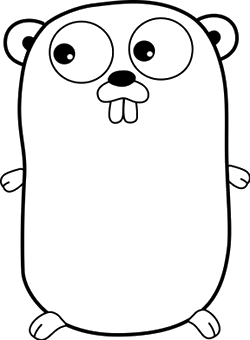

In [ ]:
import (
    "fmt"
    "io/ioutil"
    "net/http"    
)

var gopherPNG []byte
{
    res, err := http.Get("https://golang.org/doc/gopher/frontpage.png")
    if err != nil {
        fmt.Printf("Failed to get: %v\n", err)
        return
    }
    defer res.Body.Close()
    gopherPNG, err = ioutil.ReadAll(res.Body)
    if err != nil {
        fmt.Printf("Failed to read: %v\n", err)
        return
    }
    _ctx.Display.Text("PNG Gopher", nil)
    _ctx.Display.PNG(gopherPNG, nil)
}

Resized PNG

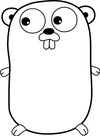

Highly compressed JPEG

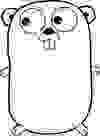

In [ ]:
import (
    "bytes"
    "image"
    png "image/png"
    jpeg "image/jpeg"
    "os"
    
    "github.com/nfnt/resize"
)

{
    img, err := png.Decode(bytes.NewBuffer(gopherPNG))
    if err != nil {
        fmt.Fprintf(os.Stderr, "Failed to decode:", err)
        return
    }
    img = resize.Resize(100, 0, img, resize.Lanczos3)
    var buf bytes.Buffer
    err = png.Encode(&buf, img)
    if err != nil {
        fmt.Fprintf(os.Stderr, "Failed to encode:", err)
        return
    }
    _ctx.Display.Text("Resized PNG", nil)
    _ctx.Display.PNG(buf.Bytes(), nil)
    
    buf.Reset()
    jpeg.Encode(&buf, img, &jpeg.Options{Quality: 1})
    _ctx.Display.Text("Highly compressed JPEG", nil)
    _ctx.Display.JPEG(buf.Bytes(), nil)
}

# Display ID
You can use the second paramter of display methods to overwrite the existing results.
See [DataDisplayer](https://godoc.org/github.com/yunabe/lgo/core#DataDisplayer) for details.

Quality: 1
Size: 1.28kB

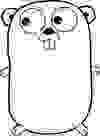

In [ ]:
import (
    "bytes"
    "fmt"
    "image"
    png "image/png"
    jpeg "image/jpeg"
    "os"
    "time"
    
    "github.com/nfnt/resize"
)

{
    img, err := png.Decode(bytes.NewBuffer(gopherPNG))
    if err != nil {
        fmt.Fprintf(os.Stderr, "Failed to decode:", err)
        return
    }
    img = resize.Resize(100, 0, img, resize.Lanczos3)
    var labelID, imgID string
    for quality := 25; quality > 0; quality -= 1 {
        var buf bytes.Buffer
        jpeg.Encode(&buf, img, &jpeg.Options{Quality: quality})
        size := float32(len(buf.Bytes()))/1000
        _ctx.Display.Text(fmt.Sprintf("Quality: %d\nSize: %.2fkB", quality, size), &labelID)
        _ctx.Display.JPEG(buf.Bytes(), &imgID)
        time.Sleep(200*time.Millisecond)
    }
}

# Compile errors

## syntax errors

In [ ]:
{
    x := 10 + 3.4 +
}
{
    for i := 0 {}
}

3:1: expected operand, found '}'
5:5: expected ';', found 'for'


## type errors

In [ ]:
{  // L.1
    a := undefined
    
    x := 10
    y := 3.4  // L.5
    z := x + y

    unused := 10
    
    for i := 0; i; i++ {}  // L.10
    
    _, _ = a, z
}

2:10: undeclared name: undefined
6:10: invalid operation: mismatched types int and float64
10:17: non-boolean condition in for statement
8:5: unused declared but not used
